In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
df=pd.read_csv("Assignment Data.csv")

In [3]:
from pandas_profiling import ProfileReport
profile=ProfileReport(df)

In [4]:
profile

In [173]:
df=pd.read_csv("Assignment Data.csv")
df.head()

,AssignmentID,Suburb,State,PostCode,Site,EventStartTimestamp,EventEndTimestamp,ClientID,Valuation,Type,Advisor,CityType
0,1,Potts Point,NSW,2011,Site A,2016-09-07T11:52:00.553,2016-09-07T14:15:00.000,10001,"4,653",Type A,Valuer A,Location A
1,2,Bronte,NSW,2024,Site A,2016-09-12T08:45:58.930,2016-09-12T10:45:00.000,10002,"3,325",Type A,Valuer A,Location A
2,3,Bondi Junction,NSW,2022,Site A,2016-09-14T12:25:50.447,2016-09-14T13:00:00.000,10003,"12,299",Type A,Valuer A,Location A
3,4,Bellevue Hill,NSW,2023,Site A,2016-09-15T07:46:40.273,2016-09-15T08:30:00.000,10002,"2,586",Type A,Valuer A,Location A
4,5,Bellevue Hill,NSW,2023,Site A,2016-09-16T16:16:40.690,2016-09-19T08:00:00.000,10004,"2,804",Type A,Valuer A,Location A


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   AssignmentID         10000 non-null  int64 
 1   Suburb               10000 non-null  object
 2   State                10000 non-null  object
 3   PostCode             10000 non-null  int64 
 4   Site                 10000 non-null  object
 5   EventStartTimestamp  10000 non-null  object
 6   EventEndTimestamp    10000 non-null  object
 7   ClientID             10000 non-null  int64 
 8    Valuation           10000 non-null  object
 9   Type                 10000 non-null  object
 10  Advisor              10000 non-null  object
 11  CityType             10000 non-null  object
dtypes: int64(3), object(9)
memory usage: 937.6+ KB


In [174]:
df.describe()

,AssignmentID,PostCode,ClientID
count,10000.00000,10000.000000,10000.000000
mean,5000.50000,2732.597000,10016.366800
std,2886.89568,597.544023,12.034839
min,1.00000,2000.000000,10001.000000
25%,2500.75000,2171.000000,10005.000000
50%,5000.50000,2565.000000,10020.000000
75%,7500.25000,3156.000000,10024.000000
max,10000.00000,3978.000000,10078.000000


In [55]:
df.isna().sum()
#no Missing records

AssignmentID           0
Suburb                 0
State                  0
PostCode               0
Site                   0
EventStartTimestamp    0
EventEndTimestamp      0
ClientID               0
 Valuation             0
Type                   0
Advisor                0
CityType               0
dtype: int64

In [60]:
df.nunique()

AssignmentID           10000
Suburb                   263
State                      2
PostCode                 153
Site                       2
EventStartTimestamp     9941
EventEndTimestamp       9809
ClientID                  78
 Valuation              8026
Type                       3
Advisor                    5
CityType                   2
dtype: int64

In [188]:
df.drop('AssignmentID',inplace=True,axis=1)

In [63]:
df.duplicated().sum()

0

In [75]:
from datetime import datetime

In [181]:
df['EventStartTimestamp']=pd.to_datetime(df['EventStartTimestamp'])

df['EventEndTimestamp']=pd.to_datetime(df['EventEndTimestamp']) 
print('the datatype of EvenStartTimestamp is :',df['EventStartTimestamp'].dtype,'\n',
     'the datatype of EvenEndTimestamp is :',df['EventEndTimestamp'].dtype)

the datatype of EvenStartTimestamp is : datetime64[ns] 
 the datatype of EvenEndTimestamp is : datetime64[ns]


In [187]:
df[' Valuation '].value_counts()[:5]

 -         25
 2,761      6
 4,210      5
 2,865      5
 2,770      5
Name:  Valuation , dtype: int64

In [16]:
df.columns

Index(['AssignmentID', 'Suburb', 'State', 'PostCode', 'Site',
       'EventStartTimestamp', 'EventEndTimestamp', 'ClientID', ' Valuation ',
       'Type', 'Advisor', 'CityType'],
      dtype='object')

In [189]:
df['Valuation']=df[' Valuation '].apply(lambda x: x.replace(",",""))

In [30]:
#df['Valuation']=df['Valuation'].apply(lambda x: x.replace(" ",""))

In [70]:
df[' Valuation '].value_counts()
#25 records have blank values

 -            25
 2,761         6
 4,210         5
 2,865         5
 2,770         5
              ..
 1,17,129      1
 32,257        1
 8,446         1
 8,396         1
 5,726         1
Name:  Valuation , Length: 8026, dtype: int64

In [202]:
df.loc[df['Valuation']==" -   "]

,Suburb,State,PostCode,Site,EventStartTimestamp,EventEndTimestamp,ClientID,Type,Advisor,CityType,Valuation,EventDuration
30,Bondi Beach,NSW,2026,Site A,2017-03-30 11:15:08.447,2017-03-30 12:15:00,10009,Type A,Valuer A,Location A,-,-1 days +23:00:08.447000
619,Ferntree Gully,Vic,3156,Site B,2017-02-07 12:43:06.497,2017-02-10 15:05:00,10022,Type C,Valuer C,Location A,-,-4 days +21:38:06.497000
1094,Ferntree Gully,Vic,3156,Site B,2017-09-07 11:00:57.257,2017-09-11 23:51:00,10013,Type C,Valuer C,Location A,-,-5 days +11:09:57.257000
1464,The Basin,Vic,3154,Site B,2018-02-08 09:24:59.530,2018-02-12 17:33:00,10022,Type C,Valuer C,Location A,-,-5 days +15:51:59.530000
1546,The Basin,Vic,3154,Site B,2018-03-09 15:21:50.990,2018-03-13 00:17:00,10017,Type C,Valuer C,Location A,-,-4 days +15:04:50.990000
3733,Edmondson Park,NSW,2174,Site A,2017-01-25 10:20:07.040,2017-01-25 20:21:00,10005,Type C,Valuer D,Location A,-,-1 days +13:59:07.040000
3734,Edmondson Park,NSW,2174,Site A,2017-01-25 10:49:48.627,2017-01-25 20:14:00,10008,Type C,Valuer D,Location A,-,-1 days +14:35:48.627000
3738,Edmondson Park,NSW,2174,Site A,2017-01-27 09:37:12.417,2017-01-30 10:51:00,10005,Type C,Valuer D,Location A,-,-4 days +22:46:12.417000
3748,Edmondson Park,NSW,2174,Site A,2017-01-30 16:59:10.420,2017-01-31 11:19:00,10005,Type C,Valuer D,Location A,-,-1 days +05:40:10.420000
3758,Edmondson Park,NSW,2174,Site A,2017-02-01 09:51:16.580,2017-02-02 14:01:00,10002,Type C,Valuer D,Location A,-,-2 days +19:50:16.580000


In [204]:
df.drop(df[df['Valuation']==" -   "].index,inplace=True)

In [96]:
df.Valuation.value_counts()

2761     6
944      5
1092     5
2770     5
2865     5
        ..
4239     1
10384    1
30866    1
2204     1
2049     1
Name: Valuation, Length: 8025, dtype: int64

In [205]:
df['Valuation']=df['Valuation'].astype('int')
df['PostCode']=df['PostCode'].astype('str')
df['ClientID']=df['ClientID'].astype('str')

In [201]:
df.drop(' Valuation ', inplace=True, axis=1)

In [95]:
df['EventDuration']=df['EventStartTimestamp']-df['EventEndTimestamp']
df.head()

,Suburb,State,PostCode,Site,EventStartTimestamp,EventEndTimestamp,ClientID,Type,Advisor,CityType,Valuation,EventDuration
0,Potts Point,NSW,2011,Site A,2016-09-07 11:52:00.553,2016-09-07 14:15:00,10001,Type A,Valuer A,Location A,4653,-1 days +21:37:00.553000
1,Bronte,NSW,2024,Site A,2016-09-12 08:45:58.930,2016-09-12 10:45:00,10002,Type A,Valuer A,Location A,3325,-1 days +22:00:58.930000
2,Bondi Junction,NSW,2022,Site A,2016-09-14 12:25:50.447,2016-09-14 13:00:00,10003,Type A,Valuer A,Location A,12299,-1 days +23:25:50.447000
3,Bellevue Hill,NSW,2023,Site A,2016-09-15 07:46:40.273,2016-09-15 08:30:00,10002,Type A,Valuer A,Location A,2586,-1 days +23:16:40.273000
4,Bellevue Hill,NSW,2023,Site A,2016-09-16 16:16:40.690,2016-09-19 08:00:00,10004,Type A,Valuer A,Location A,2804,-3 days +08:16:40.690000


<AxesSubplot:xlabel='State', ylabel='count'>

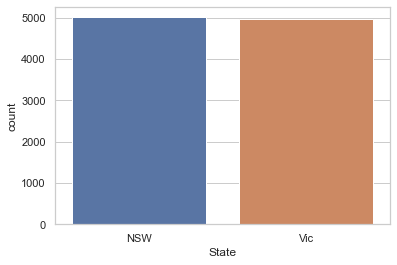

In [214]:
sns.countplot(x='State',data=df)

<AxesSubplot:xlabel='State', ylabel='Valuation'>

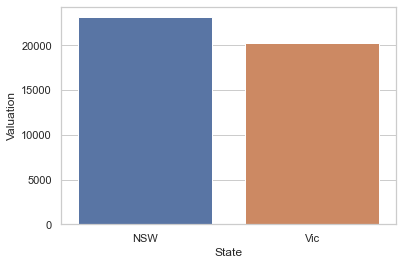

In [218]:
sns.barplot(x='State',y='Valuation',data=df,ci=None)

<AxesSubplot:xlabel='Site', ylabel='count'>

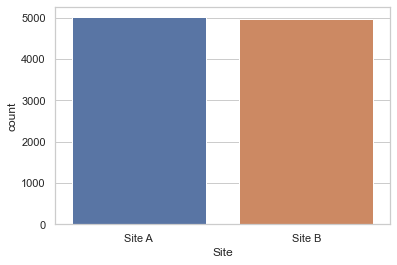

In [99]:
sns.countplot(x='Site',data=df)

<AxesSubplot:xlabel='Site', ylabel='Valuation'>

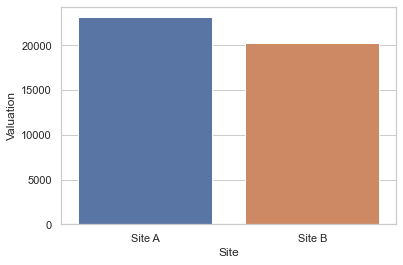

In [217]:
sns.barplot(x='Site',y='Valuation',data=df,ci=None)

<AxesSubplot:xlabel='Type', ylabel='count'>

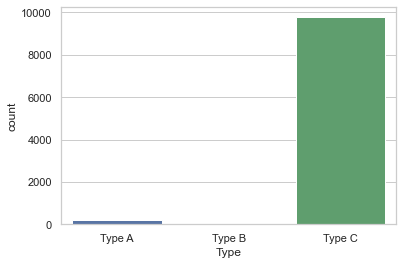

In [100]:
sns.countplot(x='Type',data=df)

<AxesSubplot:xlabel='Type', ylabel='Valuation'>

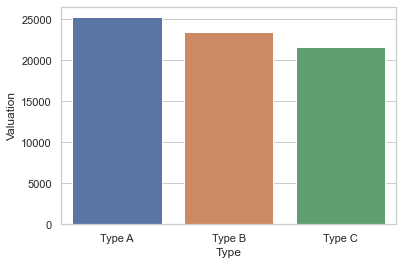

In [219]:
sns.barplot(x='Type',y='Valuation',data=df,ci=None)

<AxesSubplot:xlabel='Advisor', ylabel='count'>

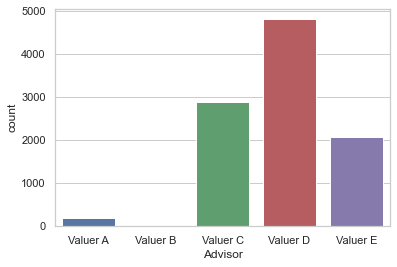

In [101]:
sns.countplot(x='Advisor',data=df)

<AxesSubplot:xlabel='CityType', ylabel='count'>

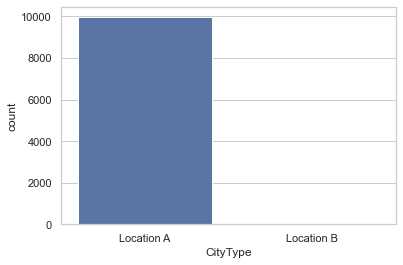

In [102]:
sns.countplot(x='CityType',data=df)

<AxesSubplot:xlabel='CityType', ylabel='Valuation'>

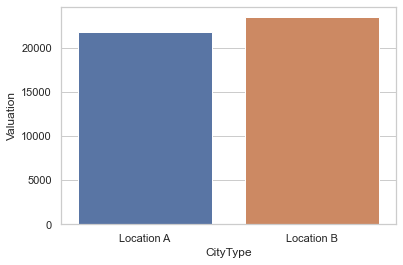

In [220]:
sns.barplot(x='CityType',y='Valuation',data=df,ci=None)

<AxesSubplot:>

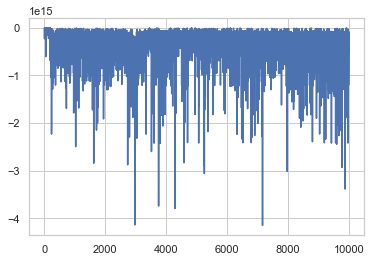

In [110]:
df.EventDuration.plot()

In [112]:
df['EventDuration'].describe()
#max time tool to evaluate a property is 49 days
# few property evluations have been done on the same day 
# on a avg, it takes 4 days to evalue a property finally

count                           9975
mean     -4 days +09:00:51.358816543
std        3 days 16:52:48.790068068
min        -49 days +22:38:23.173000
25%         -5 days +03:27:36.700000
50%         -3 days +05:29:10.820000
75%         -2 days +20:52:34.656500
max           0 days 00:19:06.910000
Name: EventDuration, dtype: object

In [233]:
df['EventDuration']=df['EventDuration'].astype('timedelta64[D]')
df['EventDuration']=abs(df['EventDuration']).astype('int')

<AxesSubplot:xlabel='EventDuration', ylabel='count'>

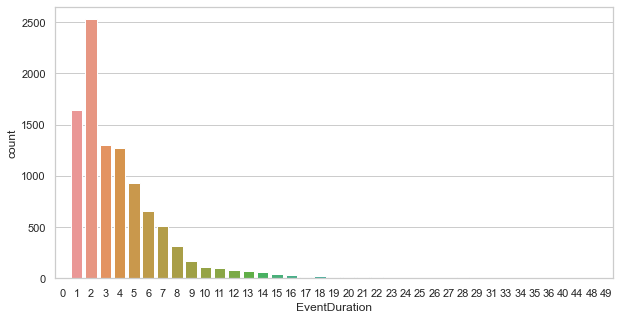

In [135]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='EventDuration',data=df)

<AxesSubplot:xlabel='EventDuration', ylabel='Valuation'>

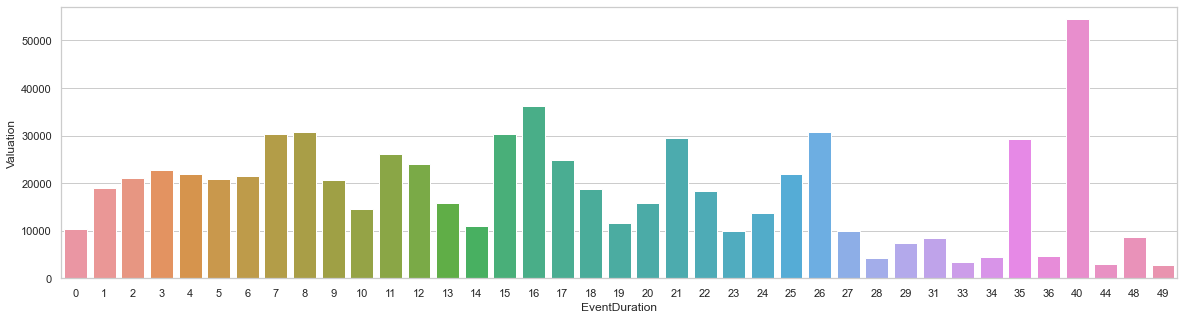

In [155]:
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='EventDuration',y='Valuation',data=df,ci = None)

In [167]:
df['Year']=df['EventEndTimestamp'].dt.year
df['Month']=df['EventEndTimestamp'].dt.month

<AxesSubplot:xlabel='Year', ylabel='count'>

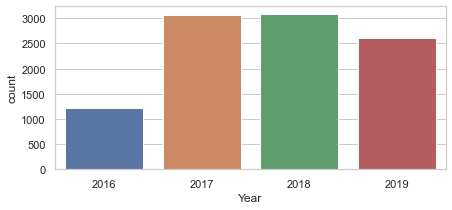

In [168]:
fig, ax = plt.subplots(figsize=(7,3))
sns.countplot(x='Year',data=df)

<AxesSubplot:xlabel='Year', ylabel='Valuation'>

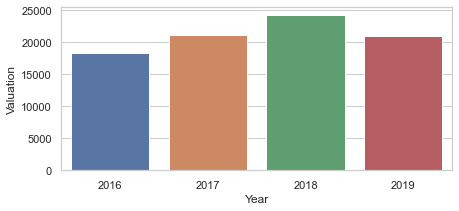

In [169]:
fig, ax = plt.subplots(figsize=(7,3))
sns.barplot(x='Year',y='Valuation',data=df,ci = None)

<AxesSubplot:xlabel='EventDuration', ylabel='Advisor'>

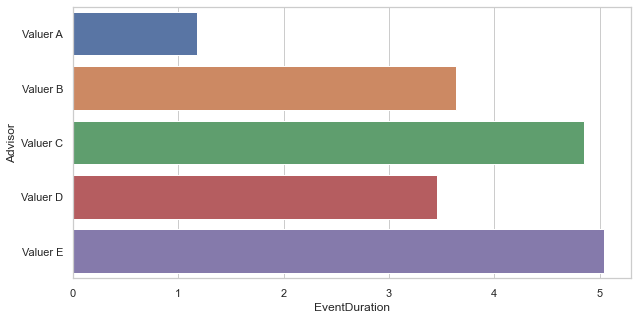

In [260]:
fig, ax = plt.subplots(figsize=(10,5))
from numpy import mean
sns.barplot(x='EventDuration',y='Advisor',data=df,ci = None,estimator=mean)

<AxesSubplot:xlabel='Valuation', ylabel='Advisor'>

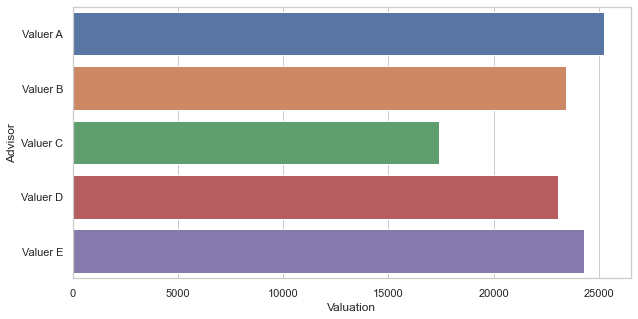

In [158]:
fig, ax = plt.subplots(figsize=(10,5))
sns.barplot(x='Valuation',y='Advisor',data=df,ci = None)

<AxesSubplot:xlabel='Advisor', ylabel='count'>

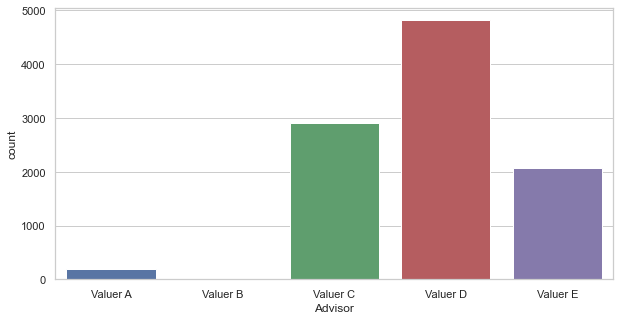

In [154]:
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='Advisor',data=df)

<AxesSubplot:xlabel='Month', ylabel='count'>

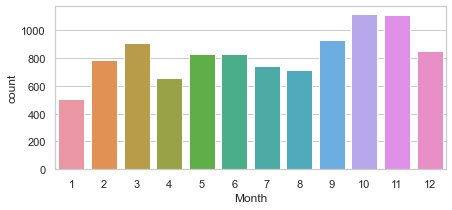

In [170]:
fig, ax = plt.subplots(figsize=(7,3))
sns.countplot(x='Month',data=df)

<AxesSubplot:xlabel='Month', ylabel='Valuation'>

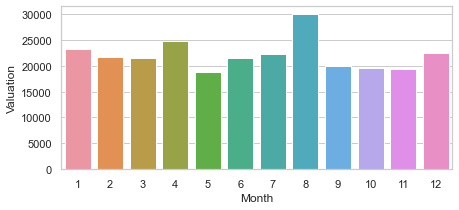

In [171]:
fig, ax = plt.subplots(figsize=(7,3))
sns.barplot(x='Month',y='Valuation',data=df,ci = None)

In [232]:
df.groupby('Advisor').sum()

,Valuation
Advisor,
Valuer A,4773558
Valuer B,257782
Valuer C,50408826
Valuer D,110986270
Valuer E,50153412


In [263]:
df.groupby('Advisor')['EventDuration'].mean().nsmallest()[:3]

Advisor
Valuer A    1.179894
Valuer D    3.459892
Valuer B    3.636364
Name: EventDuration, dtype: float64

In [249]:
df.groupby('Advisor')['Advisor'].count().nlargest()[:3]

Advisor
Valuer D    4812
Valuer C    2897
Valuer E    2066
Name: Advisor, dtype: int64

In [253]:
df.groupby('Advisor')['Valuation'].sum().nlargest()[:3]

Advisor
Valuer D    110986270
Valuer C     50408826
Valuer E     50153412
Name: Valuation, dtype: int32

<AxesSubplot:xlabel='Advisor', ylabel='Valuation'>

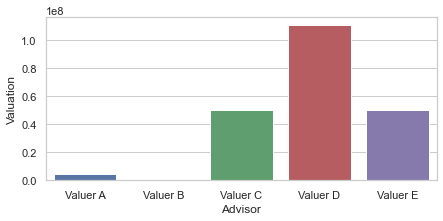

In [259]:
fig, ax = plt.subplots(figsize=(7,3))
sns.barplot(x='Advisor',y='Valuation',data=df,ci = None,estimator=sum)

In [267]:
df.EventDuration.value_counts().nsmallest(10)

40    1
31    1
48    1
49    1
35    1
36    1
0     1
44    2
33    2
34    3
Name: EventDuration, dtype: int64